<a href="https://colab.research.google.com/github/Phani2306/Data-Analysis-on-IPL-data/blob/main/EDA_On_IPLData2008_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <div style="text-align: center; background-color: #147eb0;  color: black; padding: 14px; line-height: 0.5;"> <b>EDA on IPL Data 2008-2022</b></div>

<h1>IPL Overview :</h1>
The Indian Premier League (IPL) is a professional Twenty20 cricket league in India, founded by the Board of Control for Cricket in India (BCCI). It is considered to be one of the most popular and lucrative cricket leagues in the world.

The IPL features franchise teams, each representing a different city in India, playing against each other in a double round-robin format, followed by playoffs and a final to determine the champion. The teams are owned by various corporate entities and celebrities, and players are selected through an auction process.

The league has been known for its high-profile players, including Indian stars like Virat Kohli, Rohit Sharma, and MS Dhoni, as well as international players like AB de Villiers, David Warner, and Chris Gayle.

The IPL has become a cultural phenomenon in India, with millions of fans tuning in to watch the matches on television and online streaming platforms. It has also had a significant impact on the economics of cricket, with players earning large sums of money and the league generating substantial revenue through broadcasting rights, sponsorships, and merchandise sales.


<h1>About this Dataset :</h1>
IPL is among the most famous cricket league with players coming from worldwide. What makes this series more competitive every year is the drama with every ball and hence this dataset is a complete dataset showing match information and also data for each delivery.

The file IPL_Matches_2008_2022.csv contains all details of the match: Venue of the match, Toss Decision, Match Winer, Man of the Match, Squads, etc.
The file IPL_Ball_by_Ball_2008_2022.csv contains ball by ball data of each and every match: Batsman on strike, Bowler, Extras, Runs, Wicket Ball, etc.




***

<a id="1"></a>
 # <div style="text-align: left; background-color: #147eb0;  color: black; padding: 14px; line-height: 0.5;"> 📚Importing Libraries</div>

In [2]:
!pip install colorama

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import colorama
from colorama import Fore, Back, Style


<a id="2"></a>
# <div style="text-align: left; background-color: #147eb0;  color: black; padding: 14px; line-height: 0.5;"> 📖Reading Datasets from csv files</div>

In [6]:
ball_data = pd.read_csv("IPL_Ball_by_Ball_2008_2022.csv")
match_data = pd.read_csv("IPL_Matches_2008_2022.csv")

In [7]:
#let us rename the features
match_data.columns = ['id','city','date','season','matchnumber','team1','team2','venue',
                      'tosswinner','tossdecision','superover','winningteam','wonby','margin',
                      'method','player_of_match','team1players','team2players','umpire1','umpire2']

ball_data.columns  = ['id','inning','over','ballnumber','batter','bowler','non_striker',
                      'extra_type','batsman_run','extras_run','total_runs','non_boundary',
                      'is_wicket', 'player_out','dismissal_kind','fielders_involved','battingteam']
colorsy= ['#0d293f', '#1f4956', '#185175', '#19618f', '#43779a', '#147eb0', '#2d93ca', '#58a9db', '#8ab5d8', '#9ccef0']

In [8]:
print(Back.GREEN+ Style.BRIGHT+'Match Data'+ Style.RESET_ALL)
match_data2 = match_data.drop(['team1players', 'team2players'], axis=1)
match_data2.head().style.set_properties(**{'background-color': '#cde6f7' ,'border': '1.3px solid black','color':'black','border-color': '#000000'})

Match Data


,id,city,date,season,matchnumber,team1,team2,venue,tosswinner,tossdecision,superover,winningteam,wonby,margin,method,player_of_match,umpire1,umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.000000,nan,HH Pandya,CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.000000,nan,JC Buttler,CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.000000,nan,RM Patidar,J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.000000,nan,DA Miller,BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.000000,nan,Harpreet Brar,AK Chaudhary,NA Patwardhan


In [9]:
print(Back.GREEN+ Style.BRIGHT+'Ball Data'+ Style.RESET_ALL)
ball_data.head().style.set_properties(**{'background-color': '#cde6f7' ,'border': '1.3px solid black','color':'black','border-color': '#000000'})

Ball Data


,id,inning,over,ballnumber,batter,bowler,non_striker,extra_type,batsman_run,extras_run,total_runs,non_boundary,is_wicket,player_out,dismissal_kind,fielders_involved,battingteam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,nan,0.000000,0.000000,0.000000,0.000000,0.000000,nan,nan,nan,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0.000000,1.000000,1.000000,0.000000,0.000000,nan,nan,nan,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,nan,1.000000,0.000000,1.000000,0.000000,0.000000,nan,nan,nan,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,nan,0.000000,0.000000,0.000000,0.000000,0.000000,nan,nan,nan,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,nan,0.000000,0.000000,0.000000,0.000000,0.000000,nan,nan,nan,Rajasthan Royals


<a id="3"></a>
# <div style="text-align: left; background-color: #147eb0;  color: black; padding: 14px; line-height: 0.5;"> 🗄️Data Preparation</div>

In [10]:
#Let us add new derived features to the ball_data Dataframe...
ball_data['bowlingteam'] = ''
ball_data['first_batter'] = ''
ball_data['second_batter'] = ''

In [35]:
#In ball_data, we have two types of rows, which are to be treated as same for computing the partnership
#batter        non-striker
#-------------------------
#YBK Jaiswal   JC Buttler
#JC Buttler    YBK Jaiswal

#So we will be creating two new features as below and use them from partnership calculation
#first_batter second_batter
#--------------------------
#JC Buttler    YBK Jaiswal
#JC Buttler    YBK Jaiswal

ball_data['first_batter']  = ball_data.apply(lambda x: x['batter'] if x['batter']  <  x['non_striker'] else x['non_striker'], axis=1)
ball_data['second_batter'] = ball_data.apply(lambda x: x['non_striker'] if x['batter']  <  x['non_striker'] else x['batter'], axis=1)

In [39]:
#In ball_data,we have battingteam feature, let us add bowlingteam feature
#Let us add season info too..
ball_data = pd.merge(ball_data, match_data[['id','team1','team2','season']], how='left', on='id')
ball_data['bowlingteam'] = ball_data.apply(lambda x: x['team2'] if x['battingteam'] == x['team1'] else x['team1'], axis=1)

In [13]:
#In match_data, we have winningteam team feature and let us add win_against feature to it
match_data['win_against'] = match_data.apply(lambda x: x['team2'] if x['winningteam'] == x['team1'] else x['team1'], axis=1)

<a id="4"></a>
# <div style="text-align: left; background-color: #147eb0;  color: black; padding: 14px; line-height: 0.5;"> 📊Exploratory Data Analysis</div>

<a id="4.1"></a>
### <div style="text-align: left; background-color: #58a9db;  color: black; padding: 14px; line-height: 0.5;"> 🤼‍Partnership Data Analysis</div>

<a id="4.1.1"></a>
#### <div style="text-align: left; background-color: #58a9db;  color: black; padding: 14px; line-height: 0.5;"> 🗺️Top 10 Partnerships in IPL</div>

In [14]:
#To find Top 10 partnerships in IPL History
partnership_data=ball_data.groupby(['id','season','first_batter', 'second_batter','battingteam','bowlingteam'])\
                    .agg(partnership=('total_runs','sum')).reset_index()
top10_partnerships = partnership_data.sort_values(by='partnership',ascending=False).head(10)
top10_partnerships = top10_partnerships.sort_values(by='partnership',ascending=True)

fig = go.Figure(data=px.bar(x=top10_partnerships.battingteam,
                            y=top10_partnerships.partnership,
                            color = top10_partnerships.first_batter+' & '+top10_partnerships.second_batter,
                            color_discrete_sequence=colorsy,
                            title='<b>Top 10 Partnerships in IPL</b>',
                            text = top10_partnerships.partnership,
                            height=500))
fig.update_layout(
    font_family="Courier New",
    title_font_family="Times New Roman",
    title_font_color="red",
    title_font_size=20,
    xaxis_title="<b>Batting Team</b>",
    yaxis_title="<b>Partnership</b>",
    legend_title_font_color="green"
)
fig.show()

<div style="text-align: left; background-color: #e1f0fa;  color: black; padding: 14px; line-height: 1.0;"> <b>🕵️‍♂️Observation:</b>
    <b>Royal Challengers Bangalore</b> holds 3 out top 10 Partnerships in IPL history. Highest Partnership being <b>229</b> made by <b>AB de Villiers</b> and <b>V Kohli</b>.</div>

<a id="4.1.2"></a>
#### <div style="text-align: left; background-color: #58a9db;  color: black; padding: 14px; line-height: 0.5;"> 🗺️Season-wise Top Partnerships in IPL</div>

In [15]:
#To find top partnerships per season
partnership_data['Rank'] = partnership_data.groupby('season')['partnership'].rank(ascending=False)
season_top_partnership=partnership_data[partnership_data['Rank']==1].sort_values('season')
#season_top_partnership

fig = go.Figure(data=px.bar(x=season_top_partnership.season,
                            y=season_top_partnership.partnership,
                            color = season_top_partnership.first_batter+' & '+season_top_partnership.second_batter,
                            color_discrete_sequence=colorsy,
                            title='<b>Season-wise Top Partnerships in IPL</b>',
                            text = season_top_partnership.partnership,
                            height=500))
fig.update_layout(
    font_family="Courier New",
    title_font_family="Times New Roman",
    title_font_color="red",
    title_font_size=20,
    xaxis_title="<b>Season</b>",
    yaxis_title="<b>Partnership</b>",
    legend_title_font_color="green"
)
fig.show()

<div style="text-align: left; background-color: #e1f0fa;  color: black; padding: 14px; line-height: 1.0;"> <b>🕵️‍♂️Observation:</b>
    <b>AB de Villiers</b> and <b>V Kohli</b> of <b>Royal Challengers Bangalore</b> made the highest partnership of <b>229</b> in <b>2016</b> season .</div>

<a id="4.2"></a>
### <div style="text-align: left; background-color: #58a9db;  color: black; padding: 14px; line-height: 0.5;"> 🏏Batsmen Data Analysis</div>

<a id="4.2.1"></a>
#### <div style="text-align: left; background-color: #58a9db;  color: black; padding: 14px; line-height: 0.5;"> 🖼️Top 10 Batsmen</div>

In [16]:
#Let us list the top 10 batsmen based on the total runs they made in IPL
top_batsman=ball_data.groupby(['batter']).agg(batsman_total=('batsman_run', 'sum')).reset_index()\
                .sort_values(by='batsman_total', ascending=False).head(10)

fig = px.pie(values=top_batsman.batsman_total,
             names=top_batsman.batter,
             color_discrete_sequence=px.colors.sequential.Plasma)
fig.update_traces(textposition='inside',
                  textfont_size=11,
                  textinfo='value+label')

fig.update_layout(title_text="<b>Top 10 Batsmen</b>",
                  title_font_family="Times New Roman",
                  title_font_color="red",
                  title_font_size=20,
                  uniformtext_minsize=12,
                  uniformtext_mode='hide')

fig.show()

<a id="4.2.2"></a>
#### <div style="text-align: left; background-color: #58a9db;  color: black; padding: 14px; line-height: 0.5;"> 🖼️Top 10 Batsmen Stats</div>

In [17]:
print(Back.GREEN+ Style.BRIGHT+'Top 10 Batsmen Score Details'+ Style.RESET_ALL)
top_batsman_score = pd.DataFrame(columns=['batsman', 'fours', 'sixers', 'fifties', 'hundreds','heighest_score','total_runs', 'matches_played'])
for idx, row in top_batsman.iterrows():
    batsman_data = ball_data[ball_data['batter'] == row['batter']][['id', 'batter', 'batsman_run']]

    r4 = len(batsman_data[batsman_data['batsman_run'] == 4])
    r6 = len(batsman_data[batsman_data['batsman_run'] == 6])

    innings_score = batsman_data.groupby('id').agg(score=('batsman_run', 'sum')).reset_index()
    r50=len(innings_score[(innings_score['score'] >=50) & (innings_score['score'] < 100)])
    r100 = len(innings_score[innings_score['score'] >= 100])
    matches_played =  len(innings_score)
    heighest_score = innings_score['score'].max()


    top_batsman_score = top_batsman_score.append({'batsman': row['batter'], 'fours': r4, 'sixers': r6, 'fifties':r50,
                                                  'hundreds':r100, 'total_runs':row['batsman_total'],
                                                  'heighest_score':heighest_score,
                                                  'matches_played':matches_played},ignore_index=True)

top_batsman_score.style.set_properties(**{'background-color': '#cde6f7' ,'border': '1.3px solid black','color':'black','border-color': '#000000'})

Top 10 Batsmen Score Details


<ipython-input-17-403e925918fd>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-17-403e925918fd>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-17-403e925918fd>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-17-403e925918fd>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-17-403e925918fd>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-17-403e925918fd>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us

,batsman,fours,sixers,fifties,hundreds,heighest_score,total_runs,matches_played
0,DA Warner,430,158,45,2,126.000000,4416.000000,106
1,S Dhawan,495,95,31,2,106.000000,4355.000000,137
2,V Kohli,360,144,30,5,113.000000,4307.000000,128
3,KL Rahul,322,163,31,4,132.000000,3855.000000,96
4,AB de Villiers,279,193,30,2,133.000000,3461.000000,103
5,RG Sharma,317,130,22,0,98.000000,3339.000000,127
6,SV Samson,260,153,16,3,119.000000,3317.000000,122
7,F du Plessis,286,92,22,0,96.000000,3005.000000,97
8,RV Uthappa,295,110,18,0,88.000000,2926.000000,109
9,RR Pant,262,129,15,1,128.000000,2851.000000,97


<a id="4.2.3"></a>
#### <div style="text-align: left; background-color: #58a9db;  color: black; padding: 14px; line-height: 0.5;"> 🖼️Top 10 Batsmen Run Details</div>

In [18]:
# top_batsman_score

fig = make_subplots(cols=2,rows=3,
    vertical_spacing = 0.25, horizontal_spacing=.1,
                    subplot_titles=["No. of Sixers","No. of Fours",
                                    "No. of Half-Centuries","No. of Centuries",
                                   "Highest Scores", "Total Runs"],
                    y_title="<b>Top 10 Batsmen Run Details</b>"
    )
fig.add_trace(go.Bar(x=top_batsman_score.batsman,y=top_batsman_score.sixers,name="Highest Sixers"),row=1,col=1)
fig.add_trace(go.Bar(x=top_batsman_score.batsman,y=top_batsman_score.fours,name="Highest Fours"),row=1,col=2)
fig.add_trace(go.Bar(x=top_batsman_score.batsman,y=top_batsman_score.fifties,name="Highest Fifties"),row=2,col=1)
fig.add_trace(go.Bar(x=top_batsman_score.batsman,y=top_batsman_score.hundreds,name="Highest Hundreds"),row=2,col=2)
fig.add_trace(go.Bar(x=top_batsman_score.batsman,y=top_batsman_score.heighest_score,name="Highest Score"),row=3,col=1)
fig.add_trace(go.Bar(x=top_batsman_score.batsman,y=top_batsman_score.total_runs,name="Total Runs"),row=3,col=2)
fig.update_layout(height=800,width=1000, title_text="<b>Top 10 Batsmen Performance</b>",
                  title_font_family="Times New Roman",title_font_color="red",
                  title_font_size=20,)
fig.show()

<div style="text-align: left; background-color: #e1f0fa;  color: black; padding: 14px; line-height: 1.0;"> <b>🕵️‍♂️Observation:</b>
    Highest number of runs were scored by <b>V Kohli (6634)</b> followed by <b>S Dhawan (6244)</b> and <b>DA Warner (5883)</b>.</div>

<a id="4.2.4"></a>
#### <div style="text-align: left; background-color: #58a9db;  color: black; padding: 14px; line-height: 0.5;"> 🖼️Highest 6s hitters in IPL</div>

In [19]:
highest_sixers = ball_data[ball_data['batsman_run']==6].groupby('batter').agg(six_count=('batsman_run', 'count'))\
      .reset_index().sort_values(by='six_count', ascending=False).head(10)

fig = go.Figure(data=px.bar(x=highest_sixers.batter,
                            y=highest_sixers.six_count,
                            color = highest_sixers.six_count,
                            color_discrete_sequence=px.colors.sequential.Oranges,
                            title='<b>Top 10 Six-hitters in IPL</b>',
                            text = highest_sixers.six_count,
                            height=400))

fig.update_layout(
    font_family="Courier New",
    title_font_family="Times New Roman",
    title_font_color="red",
    title_font_size=20,
    xaxis_title="<b>Batsman</b>",
    yaxis_title="<b>No. of Sixers</b>",
    legend_title_font_color="green"
)

fig.show()

<div style="text-align: left; background-color: #e1f0fa;  color: black; padding: 14px; line-height: 1.0;"> <b>🕵️‍♂️Observation:</b>
    <b>CH Gayle</b> scored highest number of sixers <b>(359)</b> followed by <b>AB de Villiers(253)</b> and <b>  RG Sharma (241)</b>.</div>

<a id="4.2.5"></a>
#### <div style="text-align: left; background-color: #58a9db;  color: black; padding: 14px; line-height: 0.5;"> 🖼️Highest 4s hitters in IPL</div>

In [20]:
highest_fours = ball_data[ball_data['batsman_run']==4].groupby('batter').agg(four_count=('batsman_run', 'count'))\
      .reset_index().sort_values(by='four_count', ascending=False).head(10)
# highest_fours
fig = go.Figure(data=px.bar(x=highest_fours.batter,
                            y=highest_fours.four_count,
                            color = highest_fours.four_count,
                            color_discrete_sequence=px.colors.sequential.Oranges,
                            title='<b>Top 10 Four-hitters in IPL</b>',
                            text = highest_fours.four_count,
                            height=400))
fig.update_layout(
    font_family="Courier New",
    title_font_family="Times New Roman",
    title_font_color="red",
    title_font_size=20,
    xaxis_title="<b>Batsman</b>",
    yaxis_title="<b>No. of Fours</b>",
    legend_title_font_color="green"
)

fig.show()

<div style="text-align: left; background-color: #e1f0fa;  color: black; padding: 14px; line-height: 1.0;"> <b>🕵️‍♂️Observation:</b>
    <b>S Dhawan</b> scored highest number of fours <b>(701)</b> followed by <b>V Kohli (581)</b> and <b>DA Warner(577)</b> .</div>

<a id="4.2.6"></a>
#### <div style="text-align: left; background-color: #58a9db;  color: black; padding: 14px; line-height: 0.5;"> 🖼️Sixer data - Team wise</div>

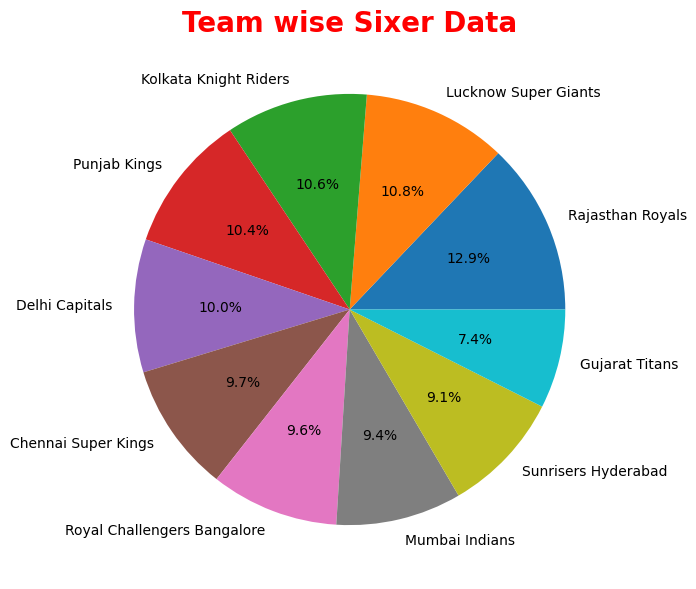

In [21]:
sixer_df=ball_data['battingteam'][(ball_data['batsman_run']==6) & (ball_data['season']=='2022')].reset_index()
sixer_df=sixer_df.groupby('battingteam').agg(sixer_count=('battingteam','count')).reset_index()
sixer_df=sixer_df.sort_values('sixer_count', ascending=False)

fig = plt.figure(figsize =(10, 7))
plt.pie(sixer_df['sixer_count'], labels = sixer_df['battingteam'], autopct='%0.1f%%')
plt.title("Team wise Sixer Data", fontsize=20, color='red', fontweight='bold')
plt.show()

<div style="text-align: left; background-color: #e1f0fa;  color: black; padding: 14px; line-height: 1.0;"> <b>🕵️‍♂️Observation:</b>
    <b>Rajasthan Royals</b> scored highest number of sixers<b>(12.9%)</b>.</div>

<a id="4.2.7"></a>
#### <div style="text-align: left; background-color: #58a9db;  color: black; padding: 14px; line-height: 0.5;"> 🖼️Top batsmen score against opponent teams</div>

In [22]:
df1 = ball_data[['batter','bowlingteam', 'batsman_run']][ball_data['batter'].isin(top_batsman['batter'])]\
            .groupby(['batter', 'bowlingteam']).agg(batter_score=('batsman_run', 'sum')).reset_index()

print(Back.GREEN+ Style.BRIGHT+'Runs scored by top batsmen against opponent teams'+ Style.RESET_ALL)
df2 = df1.pivot_table('batter_score', ['bowlingteam'], 'batter')
df2.style.background_gradient(axis=None, low=0.75, high=1.0)

Runs scored by top batsmen against opponent teams


batter,AB de Villiers,DA Warner,F du Plessis,KL Rahul,RG Sharma,RR Pant,RV Uthappa,S Dhawan,SV Samson,V Kohli
bowlingteam,,,,,,,,,,
Chennai Super Kings,232.000000,424.000000,46.000000,435.000000,461.000000,324.000000,288.000000,715.000000,197.000000,484.000000
Delhi Capitals,179.000000,182.000000,209.000000,227.000000,211.000000,nan,155.000000,28.000000,161.000000,164.000000
Delhi Daredevils,256.000000,268.000000,126.000000,136.000000,252.000000,nan,298.000000,335.000000,125.000000,337.000000
Gujarat Lions,233.000000,336.000000,69.000000,51.000000,82.000000,190.000000,111.000000,127.000000,91.000000,283.000000
Gujarat Titans,nan,nan,44.000000,8.000000,43.000000,43.000000,3.000000,97.000000,72.000000,131.000000
Kings XI Punjab,518.000000,661.000000,473.000000,102.000000,246.000000,146.000000,477.000000,436.000000,438.000000,392.000000
Kolkata Knight Riders,402.000000,722.000000,416.000000,451.000000,696.000000,309.000000,67.000000,605.000000,429.000000,643.000000
Lucknow Super Giants,nan,7.000000,96.000000,nan,45.000000,83.000000,50.000000,5.000000,45.000000,25.000000
Mumbai Indians,579.000000,529.000000,351.000000,871.000000,nan,372.000000,317.000000,589.000000,533.000000,584.000000


<a id="4.2.8"></a>
#### <div style="text-align: left; background-color: #58a9db;  color: black; padding: 14px; line-height: 0.5;"> 🖼️Plot for selected batsmen across seasons</div>

In [23]:
top_batsman =['RG Sharma', 'S Dhawan', 'SK Raina', 'V Kohli']
top_batsman_runs=ball_data[ball_data['batter'].isin(top_batsman)].groupby(['season','batter'])\
    .agg(batsman_total=('batsman_run', 'sum')).reset_index()\
    .sort_values(by=['season','batsman_total'], ascending=False)

fig = px.line(top_batsman_runs, x='season', y='batsman_total', color='batter', symbol="batter",template='simple_white')
fig.update_layout(hovermode="x unified")
fig.update_xaxes(categoryorder='category ascending')
fig.update_yaxes(showgrid=True)
fig.update_traces(line=dict(width=3.0))

fig.update_layout(
    title='<b>Batter Performance across seasons</b>',
    font_family="Courier New",
    title_font_family="Courier New",
    title_font_color="red",
    title_font_size=20,
    xaxis_title="<b>Season</b>",
    yaxis_title="<b>Runs</b>",
    legend_title='<b>Batter</b>',
    legend_title_font_color="red",
    plot_bgcolor = '#FFFFFF'
)

fig.show()

<a id="4.3"></a>
### <div style="text-align: left; background-color: #58a9db;  color: black; padding: 14px; line-height: 0.5;"> ⛹Bowler Performance Analysis</div>

<a id="4.3.1"></a>
#### <div style="text-align: left; background-color: #58a9db;  color: black; padding: 14px; line-height: 0.5;"> 🎛️Top 10 wicket takers</div>

In [24]:
print(Back.GREEN+ Style.BRIGHT+'Top 10 wicket takers'+ Style.RESET_ALL)
dismissal_list = ['caught','caught and bowled','bowled','stumped','hit wicket']
top10_bowlers=ball_data[(ball_data['is_wicket']==1) & (ball_data['dismissal_kind'].isin(dismissal_list))]\
                            .groupby('bowler').agg(wicket_count=('is_wicket', 'count'))\
                            .sort_values('wicket_count', ascending=False).reset_index().head(10)
top10_bowlers.style.background_gradient("Blues")

Top 10 wicket takers


,bowler,wicket_count
0,YS Chahal,150
1,JJ Bumrah,131
2,B Kumar,122
3,K Rabada,102
4,DJ Bravo,101
5,AR Patel,95
6,Sandeep Sharma,93
7,Mohammed Shami,87
8,RA Jadeja,86
9,AD Russell,85


<div style="text-align: left; background-color: #e1f0fa;  color: black; padding: 14px; line-height: 1.0;"> <b>🕵️‍♂️Observation:</b>
    <b>DJ Bravo</b> is the highest wicket taker with <b>175</b> wickets, followed by <b>SL Malinga (159)</b> and <b>YS Chahal (153)</b>.</div>

<a id="4.3.2"></a>
#### <div style="text-align: left; background-color: #58a9db;  color: black; padding: 14px; line-height: 0.5;"> 🎛️Wicket count against opponent teams</div>

In [25]:
print(Back.GREEN+ Style.BRIGHT+'Bowler performance(wicket count) against opponent teams'+ Style.RESET_ALL)
bowler_team = ball_data[(ball_data['is_wicket']==1) & (ball_data['dismissal_kind'].isin(dismissal_list))\
                            & (ball_data['bowler'].isin(top10_bowlers['bowler']))]\
                            .groupby(['bowler','battingteam']).agg(wkt_count=('is_wicket', 'count'))\
                            .reset_index()

bowler_team = bowler_team.pivot_table('wkt_count', ['battingteam'], 'bowler')
bowler_team.style.background_gradient("Blues")

Bowler performance(wicket count) against opponent teams


bowler,AD Russell,AR Patel,B Kumar,DJ Bravo,JJ Bumrah,K Rabada,Mohammed Shami,RA Jadeja,Sandeep Sharma,YS Chahal
battingteam,,,,,,,,,,
Chennai Super Kings,9.000000,7.000000,9.000000,nan,11.000000,8.000000,8.000000,nan,11.000000,16.000000
Delhi Capitals,5.000000,nan,8.000000,11.000000,13.000000,1.000000,9.000000,8.000000,3.000000,4.000000
Delhi Daredevils,7.000000,9.000000,5.000000,3.000000,8.000000,nan,nan,7.000000,11.000000,11.000000
Gujarat Lions,1.000000,6.000000,12.000000,nan,5.000000,2.000000,2.000000,nan,5.000000,7.000000
Gujarat Titans,4.000000,nan,2.000000,3.000000,nan,6.000000,nan,1.000000,nan,2.000000
Kings XI Punjab,12.000000,4.000000,15.000000,10.000000,18.000000,10.000000,3.000000,11.000000,6.000000,20.000000
Kolkata Knight Riders,nan,10.000000,22.000000,11.000000,18.000000,13.000000,9.000000,10.000000,6.000000,20.000000
Lucknow Super Giants,2.000000,nan,nan,1.000000,1.000000,4.000000,4.000000,nan,1.000000,4.000000
Mumbai Indians,13.000000,11.000000,16.000000,17.000000,nan,12.000000,11.000000,7.000000,12.000000,22.000000


<a id="4.3.3"></a>
#### <div style="text-align: left; background-color: #58a9db;  color: black; padding: 14px; line-height: 0.5;"> 🎛️Hattriks in IPL</div>

In [26]:
#Let us list the Hattricks scored in IPL so far
wkt_bowlers= ball_data[ball_data['is_wicket']==1].groupby(['id','bowler']).agg(wkt_count=('is_wicket', 'count')).reset_index()
hattricks = pd.DataFrame(columns= ['bowler'])
for bow_index, bow_row in wkt_bowlers[wkt_bowlers['wkt_count']>=3][['id','bowler']].iterrows():
    wkt_cnt=0
    for ball_index, ball_row in ball_data[(ball_data['id']==bow_row['id']) &
                                          (ball_data['bowler']==bow_row['bowler'])]\
                                            .sort_values(by =(['id','inning','over','ballnumber'])).iterrows():

        if ball_row['is_wicket']==1 and ball_row['dismissal_kind'] not in ['run out','retired hurt','obstructing the field'] :
            wkt_cnt +=1
            if wkt_cnt == 3:
                wkt_cnt = 0
                hattricks = hattricks.append({'bowler' : ball_row['bowler']}, ignore_index = True)
        else:wkt_cnt =0

hattricks = hattricks.groupby('bowler').agg(hatk_count=('bowler', 'count')).reset_index()
# hattricks

fig = go.Figure(data=px.bar(x=hattricks.bowler,
                            y=hattricks.hatk_count,
                            color = hattricks.bowler,
                            color_discrete_sequence=px.colors.sequential.Plasma,
                            title='<b>Hattricks in IPL</b>',
                            text = hattricks.hatk_count,
                            height=500))
fig.update_layout(
    font_family="Courier New",
    title_font_family="Times New Roman",
    title_font_color="red",
    title_font_size=20,
    xaxis_title="<b>Bowler</b>",
    yaxis_title="<b>Hattricks</b>",
    legend_title_font_color="green"
)

fig.show()

<ipython-input-26-9b0c8bc73dc1>:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-26-9b0c8bc73dc1>:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-26-9b0c8bc73dc1>:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-26-9b0c8bc73dc1>:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-26-9b0c8bc73dc1>:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-26-9b0c8bc73dc1>:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us

<div style="text-align: left; background-color: #e1f0fa;  color: black; padding: 14px; line-height: 1.0;"> <b>🕵️‍♂️Observation:</b>
    From the above data we can see <b>Amit Mishra(3 times)</b> and <b>Yuvraj Singh(2 times)</b> scoring hattricks more than once.</div>

<a id="4.4"></a>
### <div style="text-align: left; background-color: #58a9db;  color: black; padding: 14px; line-height: 0.5;"> 😊Player of the match Data Analysis</div>

In [27]:
pom_df=match_data.groupby(['season','player_of_match']).agg(pom_count=('player_of_match','count')).reset_index()
pom_df


pom_df['Rank'] = pom_df.groupby('season')['pom_count'].rank(ascending=False)
season_top_pom=pom_df[pom_df['Rank']==1].sort_values('season')
#season_top_pom

fig = go.Figure(data=px.bar(x=season_top_pom.season,
                            y=season_top_pom.pom_count,
                            color = season_top_pom.player_of_match,
                            color_discrete_sequence=colorsy,
                            title='<b>Top 10 Player-of-the-Match winners in IPL</b>',
                            text = season_top_pom.pom_count,
                            height=500))

fig.update_layout(
    font_family="Courier New",
    title_font_family="Times New Roman",
    title_font_color="red",
    title_font_size=20,
    xaxis_title="<b>Season</b>",
    yaxis_title="<b>No. of PoMs</b>",
    legend_title_font_color="green"
)

fig.show()

<a id="4.5"></a>
### <div style="text-align: left; background-color: #58a9db;  color: black; padding: 14px; line-height: 0.5;"> 🥇High scores successfully chased</div>

In [28]:
full_data = pd.merge(match_data, ball_data, how='left', on='id')

inning_data = full_data[['id', 'inning', 'total_runs']]\
                        [(full_data['superover']=='N') & (full_data['method'] !='D/L')]\
                        .groupby(['id', 'inning']).agg(inning_score=('total_runs','sum')).reset_index()
inning_data = inning_data.pivot_table('inning_score', ['id'], 'inning').reset_index()
inning_data.rename(columns = {1:'first_inning', 2:'second_inning'}, inplace=True)

match_scores = pd.merge(match_data, inning_data, how='left', on='id')

chased_matches=match_scores[match_scores['wonby']=='Wickets'].sort_values('first_inning', ascending=False)
defended_matches=match_scores[match_scores['wonby']=='Runs'].sort_values('first_inning', ascending=True)

print(Back.GREEN+ Style.BRIGHT+ 'Top 5 High scores successfully chased:' + Style.RESET_ALL)
for idx, row in chased_matches.head().iterrows():
    print(Fore.RED+ Style.BRIGHT+  row['team2'] + Style.RESET_ALL \
      + ' sucessfully chased target of ' \
      + Back.CYAN+ Style.BRIGHT+ Style.BRIGHT + str(row['first_inning']) + Style.RESET_ALL \
      + ' against '\
      + Fore.RED + Style.BRIGHT+ row['team1'] + Style.RESET_ALL
      + 'in season '
      + Fore.BLUE + Style.BRIGHT+ row['season'] + Style.RESET_ALL )

Top 5 High scores successfully chased:
Rajasthan Royals sucessfully chased target of 223.0 against Kings XI Punjabin season 2020/21
Mumbai Indians sucessfully chased target of 218.0 against Chennai Super Kingsin season 2021
Lucknow Super Giants sucessfully chased target of 210.0 against Chennai Super Kingsin season 2022
Gujarat Lions sucessfully chased target of 208.0 against Delhi Daredevilsin season 2017
Kolkata Knight Riders sucessfully chased target of 205.0 against Royal Challengers Bangalorein season 2019


<a id="4.6"></a>
### <div style="text-align: left; background-color: #58a9db;  color: black; padding: 14px; line-height: 0.5;"> 🥇Low scores successfully defended</div>

In [29]:
print(Back.GREEN+ Style.BRIGHT+ 'Top 5 Low scores successfully defended:' + Style.RESET_ALL)
for idx, row in defended_matches.head().iterrows():
    print(Fore.RED+ Style.BRIGHT+  row['team1'] + Style.RESET_ALL \
      + ' sucessfully defended target of ' \
      + Back.CYAN + Style.BRIGHT+ str(row['first_inning']) + Style.RESET_ALL \
      + ' against '\
      + Fore.RED + Style.BRIGHT+ row['team2'] + Style.RESET_ALL
      + 'in season '
      + Fore.BLUE + Style.BRIGHT+ row['season'] + Style.RESET_ALL )

Top 5 Low scores successfully defended:
Kings XI Punjab sucessfully defended target of 106.0 against Royal Challengers Bangalorein season 2015
Sunrisers Hyderabad sucessfully defended target of 118.0 against Mumbai Indiansin season 2018
Punjab Kings sucessfully defended target of 125.0 against Sunrisers Hyderabadin season 2021
Kings XI Punjab sucessfully defended target of 126.0 against Sunrisers Hyderabadin season 2020/21
Mumbai Indians sucessfully defended target of 129.0 against Rising Pune Supergiantin season 2017


<a id="4.7"></a>
### <div style="text-align: left; background-color: #58a9db;  color: black; padding: 14px; line-height: 0.5;"> 🎮Win Margin Data Analysis</div>

In [30]:
print(Back.GREEN+ Style.BRIGHT+ 'Match win with highest run margin:' + Style.RESET_ALL)
for idx, row in match_data[['winningteam','win_against', 'margin', 'season']]\
    [match_data['margin'] == match_data['margin'].max()].iterrows():
    print(Fore.RED+ Style.BRIGHT+  row['winningteam'] + Style.RESET_ALL \
      + ' won with highest ever margin of ' \
      + Back.CYAN + Style.BRIGHT+ str(row['margin']) + Style.RESET_ALL \
      + ' against '\
      + Fore.RED + Style.BRIGHT+ row['win_against'] + Style.RESET_ALL
      + 'in season '
      + Fore.BLUE + Style.BRIGHT+ row['season'] + Style.RESET_ALL )

Match win with highest run margin:
Mumbai Indians won with highest ever margin of 146.0 against Delhi Daredevilsin season 2017


In [31]:
print(Back.GREEN+ Style.BRIGHT+'Highest win margin in each season:'+ Style.RESET_ALL)
margin_df= match_data.groupby('season').agg(max_margin=('margin', 'max')).reset_index()
for idx1, row1 in margin_df[[ 'season', 'max_margin']].iterrows():
    for idx, row in match_data[['winningteam','win_against', 'margin', 'season']]\
            [(match_data['margin'] == row1['max_margin']) & (match_data['season'] == row1['season'])]\
            .iterrows():
        print(Fore.RED+ Style.BRIGHT+  row['winningteam'] + Style.RESET_ALL \
          + ' won with highest margin of ' \
          + Back.CYAN + Style.BRIGHT+ str(row['margin']) + Style.RESET_ALL \
          + ' against '\
          + Fore.RED + Style.BRIGHT+ row['win_against'] + Style.RESET_ALL
          + 'in season '
          + Fore.BLUE + Style.BRIGHT +row['season'] + Style.RESET_ALL )

Highest win margin in each season:
Kolkata Knight Riders won with highest margin of 140.0 against Royal Challengers Bangalorein season 2007/08
Mumbai Indians won with highest margin of 92.0 against Kolkata Knight Ridersin season 2009
Chennai Super Kings won with highest margin of 92.0 against Royal Challengers Bangalorein season 2009
Mumbai Indians won with highest margin of 98.0 against Delhi Daredevilsin season 2009/10
Kings XI Punjab won with highest margin of 111.0 against Royal Challengers Bangalorein season 2011
Chennai Super Kings won with highest margin of 86.0 against Delhi Daredevilsin season 2012
Royal Challengers Bangalore won with highest margin of 130.0 against Pune Warriorsin season 2013
Chennai Super Kings won with highest margin of 93.0 against Delhi Daredevilsin season 2014
Royal Challengers Bangalore won with highest margin of 138.0 against Kings XI Punjabin season 2015
Royal Challengers Bangalore won with highest margin of 144.0 against Gujarat Lionsin season 2016
M

**Head on head encounters : Team vs Team (win count on each other)**

<a id="4.8"></a>
### <div style="text-align: left; background-color: #58a9db;  color: black; padding: 14px; line-height: 0.5;"> 🏆Head on head encounters : Team vs Team (win count on each other)</div>

In [32]:
print(Back.GREEN+ Style.BRIGHT+'Head on head encounters : Team vs Team (win count on each other)'+ Style.RESET_ALL)
df1=match_data[['winningteam','win_against']].groupby(['winningteam','win_against']).agg(win_count=('win_against','count'))
df2=df1.pivot_table('win_count', ['winningteam'], 'win_against')
df2.style.background_gradient("plasma")

Head on head encounters : Team vs Team (win count on each other)


win_against,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Delhi Daredevils,Gujarat Lions,Gujarat Titans,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Lucknow Super Giants,Mumbai Indians,Pune Warriors,Punjab Kings,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad
winningteam,,,,,,,,,,,,,,,,,,
Chennai Super Kings,nan,6.000000,5.000000,12.000000,nan,nan,14.000000,1.000000,17.000000,nan,14.000000,4.000000,1.000000,15.000000,nan,nan,19.000000,13.000000
Deccan Chargers,4.000000,nan,nan,4.000000,nan,nan,3.000000,1.000000,2.000000,nan,4.000000,3.000000,nan,2.000000,nan,nan,6.000000,nan
Delhi Capitals,4.000000,nan,nan,nan,nan,nan,2.000000,nan,6.000000,nan,4.000000,nan,4.000000,6.000000,nan,nan,4.000000,6.000000
Delhi Daredevils,6.000000,7.000000,nan,nan,3.000000,nan,9.000000,1.000000,8.000000,nan,11.000000,3.000000,nan,7.000000,2.000000,nan,6.000000,4.000000
Gujarat Lions,nan,nan,nan,1.000000,nan,nan,2.000000,nan,3.000000,nan,2.000000,nan,nan,nan,1.000000,2.000000,2.000000,nan
Gujarat Titans,2.000000,nan,1.000000,nan,nan,nan,nan,nan,1.000000,2.000000,nan,nan,1.000000,3.000000,nan,nan,1.000000,1.000000
Kings XI Punjab,9.000000,7.000000,2.000000,13.000000,2.000000,nan,nan,1.000000,9.000000,nan,12.000000,3.000000,nan,9.000000,1.000000,1.000000,14.000000,5.000000
Kochi Tuskers Kerala,1.000000,nan,nan,1.000000,nan,nan,nan,nan,2.000000,nan,1.000000,nan,nan,1.000000,nan,nan,nan,nan
Kolkata Knight Riders,9.000000,7.000000,3.000000,13.000000,1.000000,nan,18.000000,nan,nan,nan,9.000000,4.000000,2.000000,14.000000,1.000000,2.000000,16.000000,15.000000


<a id="4.9"></a>
### <div style="text-align: left; background-color: #58a9db;  color: black; padding: 14px; line-height: 0.5;"> 🏟️Count of matches conducted at each venue</div>

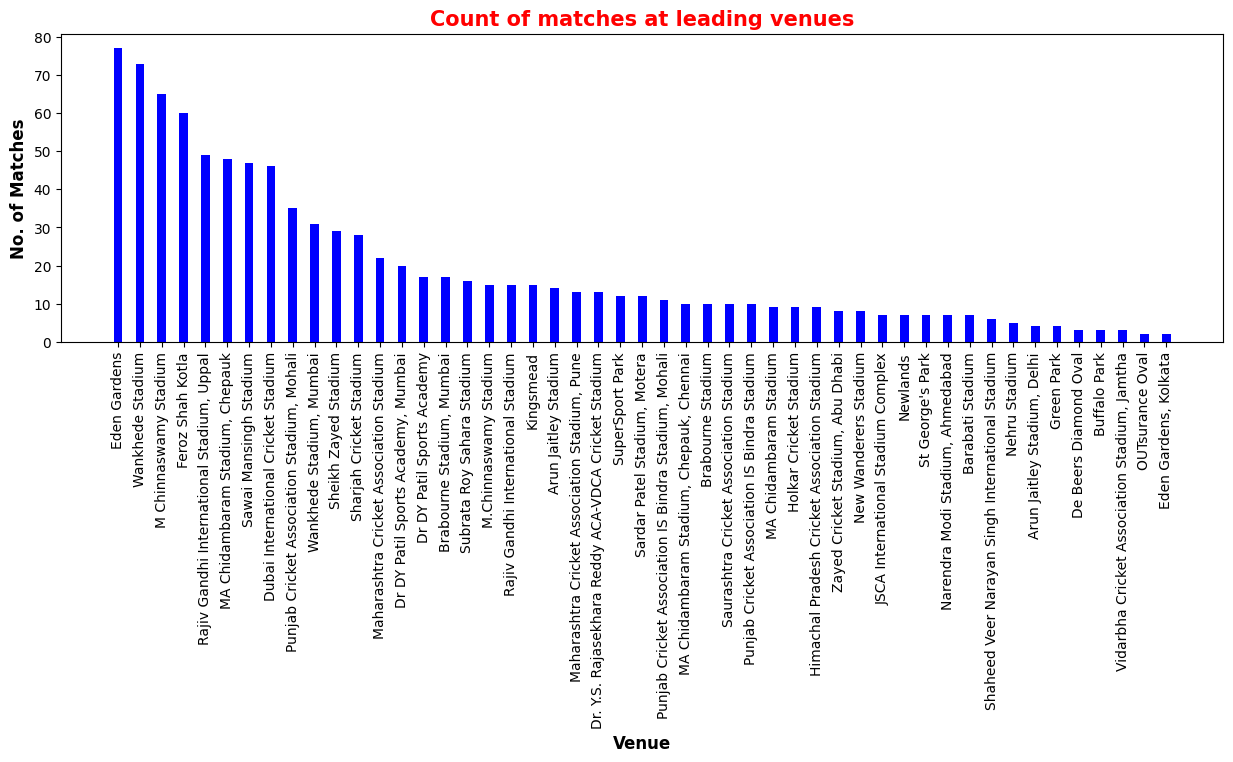

In [34]:
venue_df=match_data.groupby('venue').agg(match_count=('venue', 'count')).reset_index().sort_values('match_count', ascending=False)

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(4)
plt.bar(venue_df['venue'], venue_df['match_count'], color ='blue',width = 0.4)
plt.xlabel("Venue", fontsize=12, fontweight='bold')
plt.ylabel("No. of Matches", fontsize=12, fontweight='bold')
plt.xticks(rotation=90)
plt.title("Count of matches at leading venues", fontsize=15, color='red', fontweight='bold')
plt.show()

<div style="text-align: left; background-color: #e1f0fa;  color: black; padding: 14px; line-height: 1.0;"> <b>🕵️‍♂️Observation:</b>
    Eden Gardens has hosted highest number of IPL Matches</div>